In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from allison.linear_models.logistic_regression import LogisticRegression
from allison.utils.functions.loss import binary_cross_entropy
from allison.utils.functions.activation import Sigmoid
from allison.utils.metrics import accuracy

In [4]:
data=pd.read_csv("../data/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
def numeric_labels(categorical_labels):
    
    labels=list(set(categorical_labels))
    numeric_labels=[]
    
    for cat_label in categorical_labels:
        if cat_label in labels:
            numeric_labels.append(labels.index(cat_label))
    
    return sorted(numeric_labels)
            

In [6]:
data['labels']=numeric_labels(data['Species'])

In [7]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [8]:
data=data[data['labels']<2]

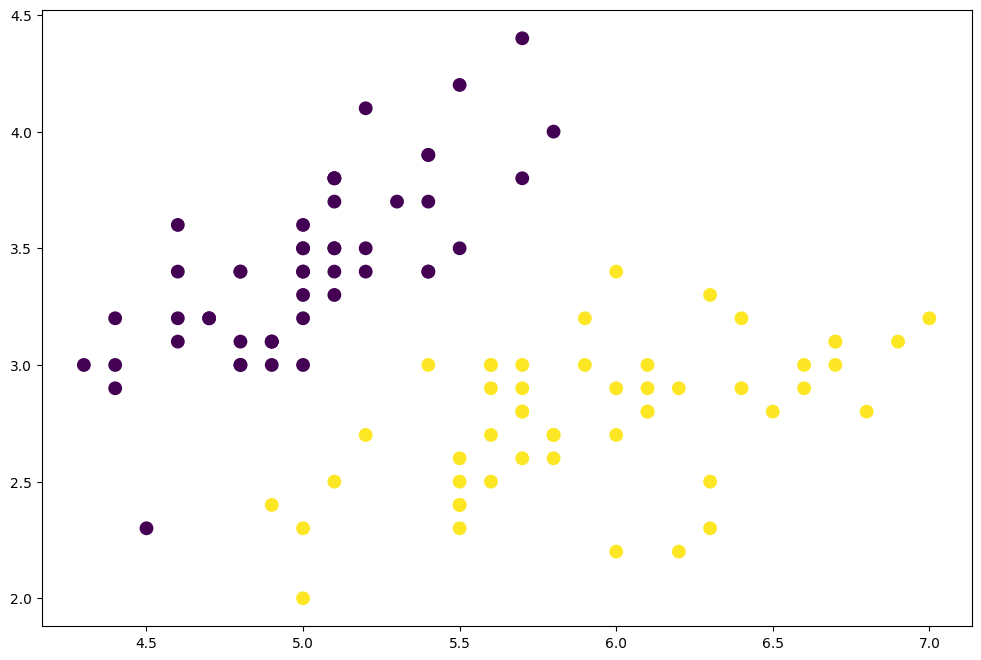

In [9]:
plt.figure(figsize=(12,8))
plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'],s=80,c=data['labels'] )

In [21]:
features=data[['SepalLengthCm','SepalWidthCm']].to_numpy()

In [22]:
labels=data['labels'].to_numpy()
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
model=LogisticRegression()

model.optimizers(function_of_activation=Sigmoid, 
                 loss_function=binary_cross_entropy,
                 lr=0.001, 
                 metrics=accuracy)

In [24]:
hist_train=model.train(n_iters=21,
                       features=features,
                       labels=labels, 
                       callbacks_period=3)

Iter:	3	==================================================>	 accuracy:	 59.00%  


Iter:	6	==================================================>	 accuracy:	 93.00%  


Iter:	9	==================================================>	 accuracy:	 93.00%  


Iter:	12	==================================================>	 accuracy:	 93.00%  


Iter:	15	==================================================>	 accuracy:	 93.00%  


Iter:	18	==================================================>	 accuracy:	 93.00%  


Iter:	21	==================================================>	 accuracy:	 93.00%  




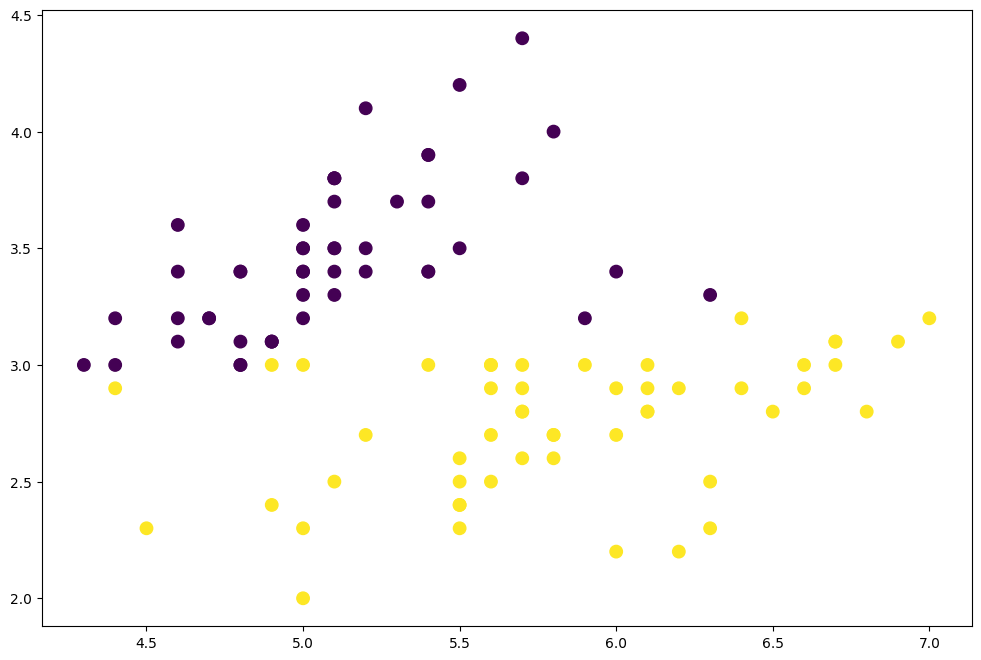

In [26]:
plt.figure(figsize=(12,8))
plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'],s=80,c=model.predict(features) )
